# Superhero NLP Notebook

Trying to determine if superheros are good or evil based on thier historical text. Not sure this is possible but it should be fun anyway!

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string, re
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Data

In [2]:
df = pd.read_csv('data/superheroes_nlp_dataset.csv')
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [4]:
df.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,...,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,...,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


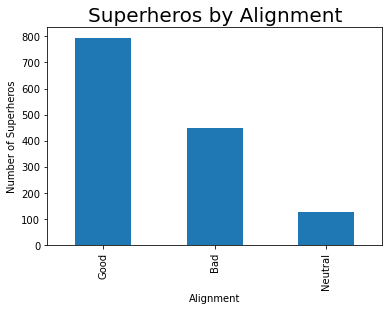

In [5]:
df.alignment.value_counts().plot(kind='bar')
plt.xlabel('Alignment')  
plt.ylabel('Number of Superheros')  
plt.title("Superheros by Alignment", fontsize=20,) 
plt.show()

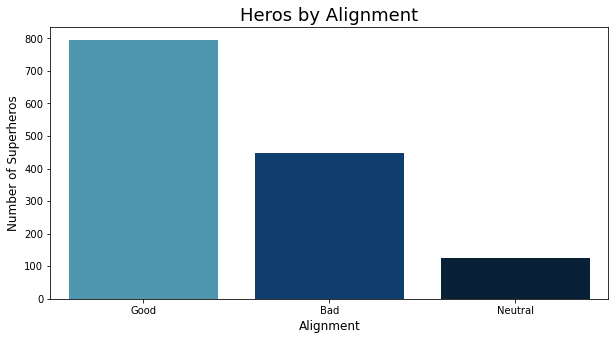

In [6]:
hero_count  = df['alignment'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=hero_count.index, y=hero_count.values, palette='ocean_r')
plt.title('Heros by Alignment', fontsize=18)
plt.ylabel('Number of Superheros', fontsize=12)
plt.xlabel('Alignment', fontsize=12)

plt.show()

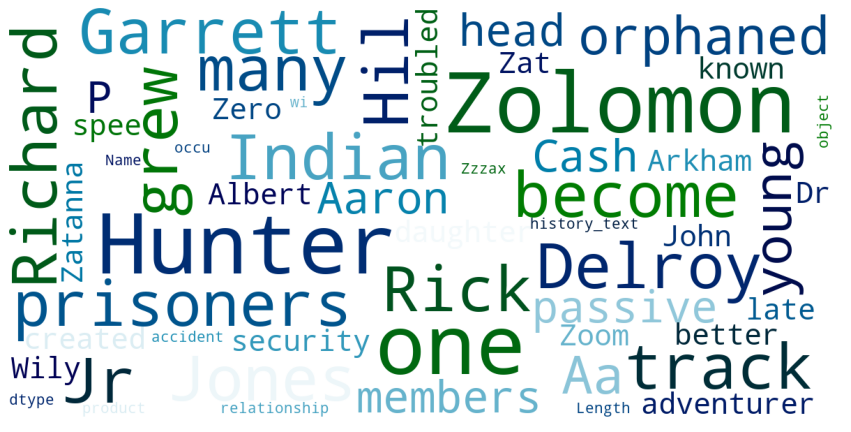

In [7]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40,
        max_words=150,
        colormap='ocean',
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['history_text'])

In [8]:
df.isna().sum()

name                    2
real_name             149
full_name             494
overall_score           0
history_text           90
                     ... 
has_super_speed        67
has_durability         67
has_stamina            67
has_agility            67
has_super_strength     67
Length: 81, dtype: int64

In [9]:
df['total_score'] = df.sum(axis=1)

In [10]:
df.total_score.describe()

count    1450.000000
mean      365.915172
std       152.228241
min         0.000000
25%       285.000000
50%       372.000000
75%       472.000000
max       647.000000
Name: total_score, dtype: float64

In [11]:
df.nlargest(10,['total_score'])

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,total_score
1281,The Golden Master,Overlord,Overlord,∞,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,647.0
526,Golden Master's Mech,Overlord,NaN,∞,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,644.0
482,First Spinjitzu Master,Unknown,Unknown,∞,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,640.0
1292,The Overlord (Garmadon),Overlord,Overlord,67,"As Garmadon admired the Garmatron, the Stone A...",After using Lord Garmadon's body to retake a p...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,638.0
976,Old King Thor,Thor Odinson,Thor Odinson,100,NaN,"King Thor, as the All-Father in the future pos...",100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,636.0
527,Golden Ninja,Lloyd Garmadon,LLoyd Montgomery Garmadon,226,"Lloyd becomes the Golden Ninja, and fights the...","Initially, Lloyd had no outstanding combat ski...",100,100,100,100,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,635.0
324,Cosmic King Thor,Thor Odinson,Thor Odinson,117,NaN,▪︎Superhuman Physical Characteristics ▪︎Weathe...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,634.0
1337,True Form Oblivion,Oblivion,Oblivion,∞,NaN,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,634.0
809,Living Tribunal,NaN,NaN,∞,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,633.0
1293,The Overlord,Overlord,NaN,165,"Before Ninjago's creation, there were two kind...",The Overlord was credited with the creation of...,100,100,100,100,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,632.0


In [14]:
top_heros = df.sort_values('total_score', ascending = False).head(10)
top_heros

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,total_score
1281,The Golden Master,Overlord,Overlord,∞,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,647.0
526,Golden Master's Mech,Overlord,NaN,∞,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,644.0
482,First Spinjitzu Master,Unknown,Unknown,∞,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,640.0
1292,The Overlord (Garmadon),Overlord,Overlord,67,"As Garmadon admired the Garmatron, the Stone A...",After using Lord Garmadon's body to retake a p...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,638.0
976,Old King Thor,Thor Odinson,Thor Odinson,100,NaN,"King Thor, as the All-Father in the future pos...",100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,636.0
527,Golden Ninja,Lloyd Garmadon,LLoyd Montgomery Garmadon,226,"Lloyd becomes the Golden Ninja, and fights the...","Initially, Lloyd had no outstanding combat ski...",100,100,100,100,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,635.0
324,Cosmic King Thor,Thor Odinson,Thor Odinson,117,NaN,▪︎Superhuman Physical Characteristics ▪︎Weathe...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,634.0
1337,True Form Oblivion,Oblivion,Oblivion,∞,NaN,"""Now don't think badly of me: I can't help but...",100,100,100,100,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,634.0
809,Living Tribunal,NaN,NaN,∞,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,633.0
1293,The Overlord,Overlord,NaN,165,"Before Ninjago's creation, there were two kind...",The Overlord was credited with the creation of...,100,100,100,100,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,632.0


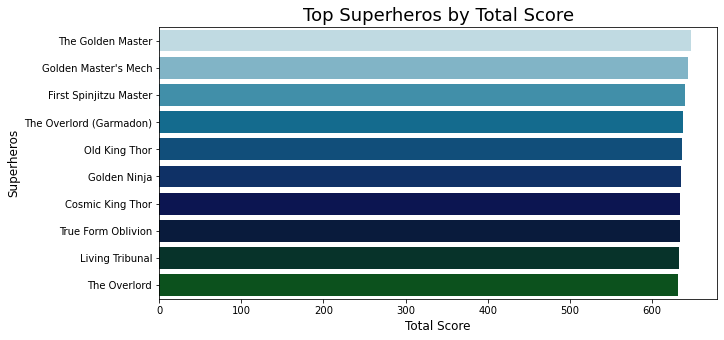

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(y=top_heros.name, x=top_heros.total_score, palette='ocean_r', orient = 'h')
plt.title('Top Superheros by Total Score', fontsize=18)
plt.ylabel('Superheros', fontsize=12)
plt.xlabel('Total Score', fontsize=12)
plt.show()

In [16]:
df.overall_score.value_counts()

6      162
7      147
8      136
-      107
5      100
      ... 
68       1
58       1
62       1
75       1
169      1
Name: overall_score, Length: 93, dtype: int64

In [17]:
df.overall_score.unique()

array(['6', '10', '20', '12', '5', '8', '9', '22', '13', '29', '∞', '7',
       '19', '2', '15', '14', '50', '34', '35', '-', '4', '37', '3', '70',
       '11', '21', '67', '32', '222', '1', '16', '18', '80', '17', '28',
       '42', '117', '30', '71', '130', '84', '73', '23', '112', '229',
       '24', '61', '120', '40', '142', '124', '211', '27', '54', '33',
       '57', '169', '226', '77', '237', '26', '41', '38', '47', '46',
       '87', '25', '60', '82', '89', '78', '69', '43', '66', '62', '31',
       '64', '49', '58', '126', '163', '65', '100', '108', '125', '94',
       '75', '53', '152', '165', '83', '68', '146'], dtype=object)

In [18]:
df.loc[df.overall_score == '∞']

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,total_score
11,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",100,100,100,100,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,618.0
153,Beyonder,NaN,NaN,∞,"Within a pocket realm in the Negative Zone, th...","In all of his versions, The Beyonder has the g...",100,100,100,100,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,618.0
174,Black Alice,Lori Zechlin,Lori Zechlin,∞,"A teenage girl with an interest in magick, Lor...",Black Alice has the ability to temporarily usu...,95,100,100,85,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,607.0
376,Death Of The Endless,Death,Death Of The Endless,∞,Death of the Endless came into existence short...,Personification of Death: One of the seven End...,100,100,100,100,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,581.0
450,Eru Iluvatar,Eru,NaN,∞,Eru is the supreme deity of Arda. He was the s...,NaN,100,100,100,100,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,610.0
482,First Spinjitzu Master,Unknown,Unknown,∞,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,640.0
526,Golden Master's Mech,Overlord,NaN,∞,While some of the Nindroids under Cryptor retr...,The Golden Master's Mech (also known as the Ul...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,644.0
795,Life Entity,The Life Entity,NaN,∞,NaN,Powers It's the manifested form of life and c...,100,100,100,100,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,615.0
803,Little Krishna,Krishna,Krishna,∞,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,627.0
809,Living Tribunal,NaN,NaN,∞,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,633.0


In [19]:
df.overall_score.describe()

count     1450
unique      93
top          6
freq       162
Name: overall_score, dtype: object

In [20]:
df['rank'] = df.overall_score

In [21]:
df['rank'] = df['rank'].str.replace('∞','300')

In [22]:
df['rank'] = df['rank'].str.replace('-','0')

In [23]:
df['rank'] = df['rank'].astype(int)

In [24]:
df['rank'].describe()

count    1450.000000
mean       17.028966
std        38.288188
min         0.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       300.000000
Name: rank, dtype: float64

In [25]:
df.loc[(df['rank'] > 145) & (df['rank'] < 300) ]

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,total_score,rank
110,Aztar,Aztar,Aztar,222,Since the beginnings of human civilization the...,"Divine Wrath: As a spiritual entity, the Spec...",100,100,100,100,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,600.0,222
393,Devilman,Akira Fudo,Akira Fudo,229,Transformation Akira is first seen walking hom...,Extraordinary Intellect Prior to becoming Dev...,90,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,619.0,229
421,Dracula,Vlad Tepes Dracula,Vlad Tepes Dracula,211,The man later known as Dracula was originally...,Passive Attributes Summoning his Demon Castle:...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,611.0,211
522,Goblin Force,NaN,NaN,169,The Goblin Force was born at the beginning of ...,The Goblin Force possesses an unknown capacit...,100,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,544.0,169
527,Golden Ninja,Lloyd Garmadon,LLoyd Montgomery Garmadon,226,"Lloyd becomes the Golden Ninja, and fights the...","Initially, Lloyd had no outstanding combat ski...",100,100,100,100,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,635.0,226
538,Great Evil Beast,The Great Darkness,NaN,237,The Great Evil Beast was formed when God utter...,I don't know much about his powers so this is ...,100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,626.0,237
934,Nadakhan,Nadakhan The Djinn,Nadakhan,163,"Nadakhan is the captain of the Sky Pirates, th...",Nadakhan is one of the most powerful villains ...,95,75,85,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,574.0,163
1286,The Keeper,Norrin Radd,Norrin Radd,152,His origin is the same as the original Silver ...,"As Norrin Radd, he was a scientist, a dreamer,...",75,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,583.0,152
1293,The Overlord,Overlord,NaN,165,"Before Ninjago's creation, there were two kind...",The Overlord was credited with the creation of...,100,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,632.0,165
1348,Unicron,Unicron,Unicron,146,Unicron is the eternal arch-enemy of his twin ...,NaN,100,100,100,100,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,595.0,146


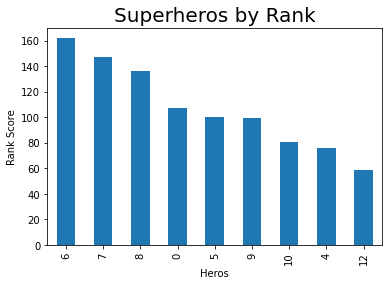

In [26]:
df['rank'].value_counts()[0:9].plot(kind='bar')
plt.xlabel('Heros')  
plt.ylabel('Rank Score')  
plt.title("Superheros by Rank", fontsize=20,) 
plt.show()

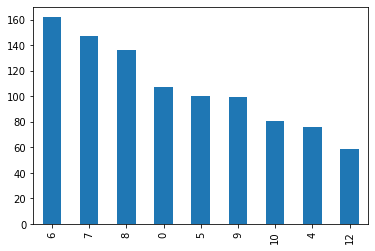

In [27]:
top_rank = df['rank'].value_counts()[0:9].plot(kind='bar')

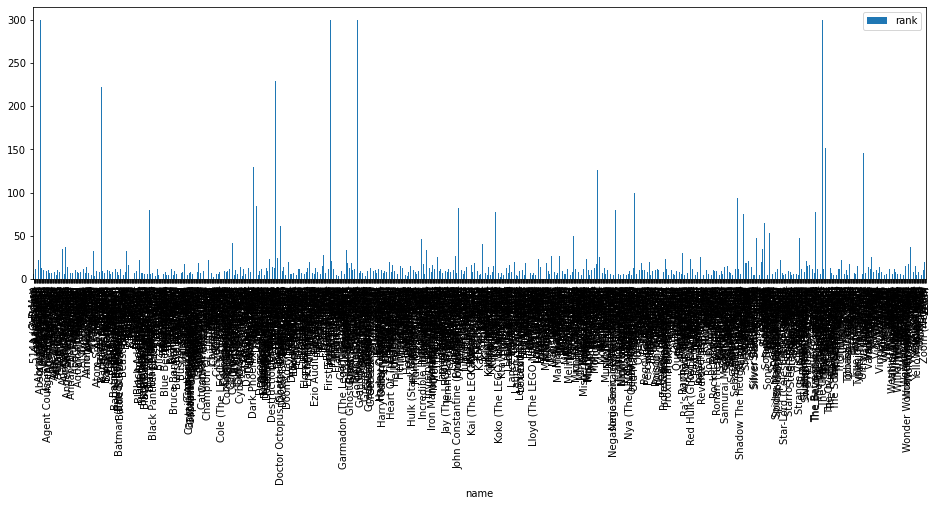

In [28]:
df.plot(x = "name", y = "rank", kind = "bar", figsize=(16,5))
plt.show()

In [31]:
top_rank = df.sort_values('rank', ascending = False).head(10)
top_rank

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,total_score,rank
1272,The Beyonder (Earth-1298),Beyonder,Beyonder,∞,Known as the Beyonder due to the fact that he ...,NaN,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,583.0,300
809,Living Tribunal,NaN,NaN,∞,NaN,The Living Tribunal was the embodiment of the...,100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,633.0,300
482,First Spinjitzu Master,Unknown,Unknown,∞,"Long before time had a name, the First Spinjit...",The First Spinjitzu Master was the first human...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,640.0,300
450,Eru Iluvatar,Eru,NaN,∞,Eru is the supreme deity of Arda. He was the s...,NaN,100,100,100,100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,610.0,300
1289,The Lord Of Light,R'hllor,NaN,∞,"Melisandre, a Red Priestess of the Lord of Lig...",NaN,100,100,100,100,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,609.0,300
795,Life Entity,The Life Entity,NaN,∞,NaN,Powers It's the manifested form of life and c...,100,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,615.0,300
803,Little Krishna,Krishna,Krishna,∞,NaN,Nigh-Omnipotence Krishna is the 8th avatar of ...,100,100,100,100,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,627.0,300
1281,The Golden Master,Overlord,Overlord,∞,The Golden Master is an ancient figure of evil...,Lloyd eventually unlocked the full potential o...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,647.0,300
11,Abraxas,Abraxas,Abraxas,∞,"Born within the abstract entity Eternity, Abra...","As antithesis to the cosmic entity Eternity, A...",100,100,100,100,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,618.0,300
1290,The One Below All,Unknown,NaN,∞,NaN,The One Below All is the source of the mutagen...,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,627.0,300


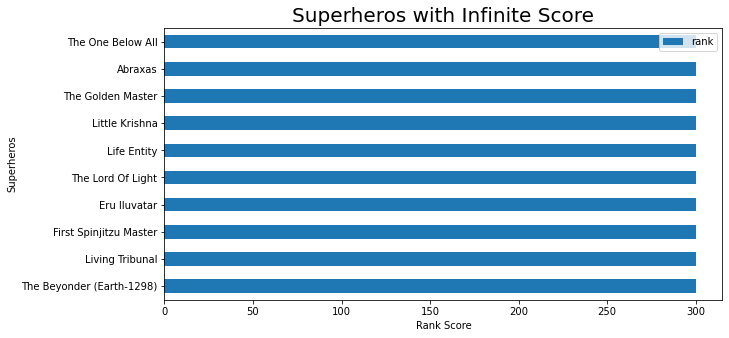

In [48]:
top_rank.plot(x = "name", y = "rank", kind = "barh", figsize=(10,5))
plt.xlabel('Rank Score')  
plt.ylabel('Superheros')  
plt.title("Superheros with Infinite Score", fontsize=20) 
plt.show()

In [32]:
top_rank.name

1272    The Beyonder (Earth-1298)
809               Living Tribunal
482        First Spinjitzu Master
450                  Eru Iluvatar
1289            The Lord Of Light
795                   Life Entity
803                Little Krishna
1281            The Golden Master
11                        Abraxas
1290            The One Below All
Name: name, dtype: object

In [40]:
hero_rank = df.loc[(df['rank'] > 145) & (df['rank'] < 300)]
hero_rank.name

110                Aztar
393             Devilman
421              Dracula
522         Goblin Force
527         Golden Ninja
538     Great Evil Beast
934             Nadakhan
1286          The Keeper
1293        The Overlord
1348             Unicron
Name: name, dtype: object

In [43]:
rank_heros = hero_rank.sort_values('rank', ascending = False).head(10)

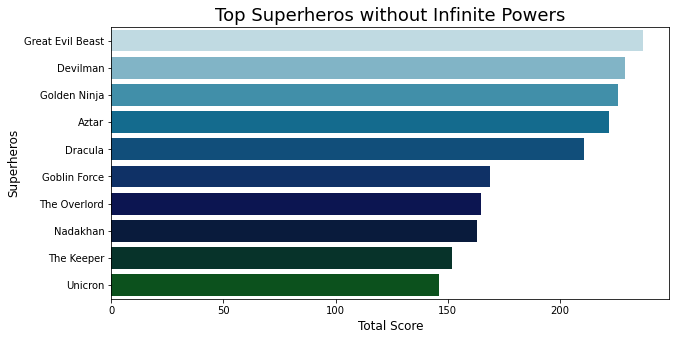

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(y=rank_heros.name, x=rank_heros['rank'], palette='ocean_r', orient = 'h')
plt.title('Top Superheros without Infinite Powers', fontsize=18)
plt.ylabel('Superheros', fontsize=12)
plt.xlabel('Total Score', fontsize=12)

plt.show()


In [49]:
# Average number of words per string of history_text

In [50]:
df.history_text[0]

"Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he tested positive for steroids, he lost his three gold medals. In despair, he turned to religion, specifically the Triune Understanding. This group's founder, Jonathan Tremont, had found one of three fragments of a mysterious object and used it to give Garrett the powers of 3-D Man. Garrett assumed that his powers were because of his newfound spiritual enlightenment, and Tremont never disabused him of the notion."

In [51]:
df['history_text'].str.split().str.len()

0         84.0
1        675.0
2        988.0
3        988.0
4         26.0
         ...  
1445     254.0
1446    8472.0
1447      64.0
1448    1208.0
1449    1006.0
Name: history_text, Length: 1450, dtype: float64

In [52]:
df['history_text'].str.split().str.len().mean()

660.3691176470588

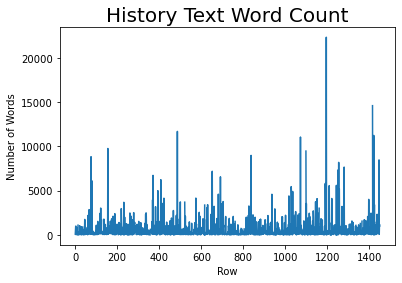

In [53]:
df['history_text'].str.split().str.len().plot()
plt.xlabel('Row')  
plt.ylabel('Number of Words')  
plt.title("History Text Word Count", fontsize=20,) 
plt.show()

In [54]:
df['history_text'].str.split().str.len().max()

22326.0

<AxesSubplot:xlabel='history_text', ylabel='Count'>

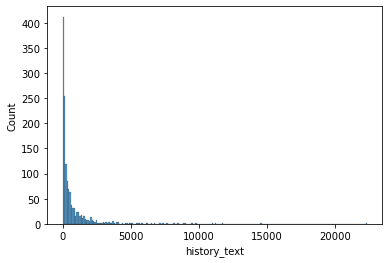

In [55]:
sns.histplot(data = df['history_text'].str.split().str.len())

In [56]:
df.history_text.loc[df.index == 1195]

1195    Past Not much is known about Sonic's early lif...
Name: history_text, dtype: object

In [57]:
len(df.history_text[1195].split())

22326

In [62]:
df.alignment.isnull().sum()

82

In [63]:
df.history_text.isnull().sum()

90

# Cleaning

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [64]:
new_df = df[['history_text', 'alignment']]
new_df

,history_text,alignment
0,"Delroy Garrett, Jr. grew up to become a track ...",Good
1,He was one of the many prisoners of Indian Hil...,NaN
2,"Richard ""Rick"" Jones was orphaned at a young ...",Good
3,Aa is one of the more passive members of the P...,Good
4,Aaron Cash is the head of security at Arkham A...,Good
...,...,...
1445,Zatanna is the daughter of adventurer John Zat...,Good
1446,Zero was created by the late Dr. Albert Wily ...,Good
1447,"Hunter Zolomon is better known as Zoom, a spee...",Bad
1448,Hunter Zolomon had a troubled relationship wi...,Bad


In [65]:
new_df.dropna()

,history_text,alignment
0,"Delroy Garrett, Jr. grew up to become a track ...",Good
2,"Richard ""Rick"" Jones was orphaned at a young ...",Good
3,Aa is one of the more passive members of the P...,Good
4,Aaron Cash is the head of security at Arkham A...,Good
5,ayla Secura was a Rutian Twi'lek Jedi Knight (...,Good
...,...,...
1445,Zatanna is the daughter of adventurer John Zat...,Good
1446,Zero was created by the late Dr. Albert Wily ...,Good
1447,"Hunter Zolomon is better known as Zoom, a spee...",Bad
1448,Hunter Zolomon had a troubled relationship wi...,Bad


In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   history_text  1360 non-null   object
 1   alignment     1368 non-null   object
dtypes: object(2)
memory usage: 22.8+ KB


In [67]:
new_df.alignment.unique()

array(['Good', nan, 'Bad', 'Neutral'], dtype=object)

In [69]:
new_df['alignment'] = new_df['alignment'].str.replace('Neutral','Bad')
new_df['alignment'].unique()

<ipython-input-69-58e6df49e004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['alignment'] = new_df['alignment'].str.replace('Neutral','Bad')


array(['Good', nan, 'Bad'], dtype=object)

In [70]:
new_df['alignment'].value_counts()

Good    795
Bad     573
Name: alignment, dtype: int64

In [73]:
new_df['alignment'].dropna()

0       Good
2       Good
3       Good
4       Good
5       Good
        ... 
1445    Good
1446    Good
1447     Bad
1448     Bad
1449     Bad
Name: alignment, Length: 1368, dtype: object

In [78]:
new_df.loc[new_df['alignment']=='']

,history_text,alignment


In [85]:
new_df.dropna()

,history_text,alignment
0,"Delroy Garrett, Jr. grew up to become a track ...",Good
2,"Richard ""Rick"" Jones was orphaned at a young ...",Good
3,Aa is one of the more passive members of the P...,Good
4,Aaron Cash is the head of security at Arkham A...,Good
5,ayla Secura was a Rutian Twi'lek Jedi Knight (...,Good
...,...,...
1445,Zatanna is the daughter of adventurer John Zat...,Good
1446,Zero was created by the late Dr. Albert Wily ...,Good
1447,"Hunter Zolomon is better known as Zoom, a spee...",Bad
1448,Hunter Zolomon had a troubled relationship wi...,Bad


# Train/Test Split

# Model 1


# Conclusions

# Future Work